<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   W_PCT            2849 non-null   float64
 1   AGE              2849 non-null   int64  
 2   FGM              2849 non-null   float64
 3   FGA              2849 non-null   float64
 4   FG_PCT           2849 non-null   float64
 5   FG3M             2849 non-null   float64
 6   FG3A             2849 non-null   float64
 7   FG3_PCT          2849 non-null   float64
 8   FTM              2849 non-null   float64
 9   FTA              2849 non-null   float64
 10  FT_PCT           2849 non-null   float64
 11  OREB             2849 non-null   float64
 12  DREB             2849 non-null   float64
 13  REB              2849 non-null   float64
 14  AST              2849 non-null   float64
 15  TOV              2849 non-null   float64
 16  STL              2849 non-null   float64
 17  BLK           

<AxesSubplot:xlabel='W_PCT', ylabel='count'>

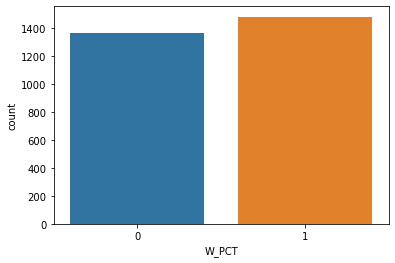

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# step1 loading data,check null value
player=pd.read_csv('2010-16.csv',sep=',')
player.info()
player.isnull().sum()
# step 2, processing data,set up unique labels and group names,use labelEncoder to set up the ratio to 0,1,
# use sns to shrew it into  a graph
# may play with the bins and make the bins lean more towards the high win ratio
bins=(-0.1,0.5,1.0)
group_names=['low','high']
player['W_PCT']=pd.cut(player['W_PCT'], bins=bins,labels=group_names)
player['W_PCT'].unique()
label_ratio=LabelEncoder()
player['W_PCT']=label_ratio.fit_transform(player['W_PCT'].astype(str))
sns.countplot(x=player['W_PCT'])

In [17]:
player.head(20)
# label(1,0)

,W_PCT,AGE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3
0,1,26,3.7,9.9,0.375,1.2,4.0,0.297,2.1,2.4,...,0.6,0.1,0.7,1.9,2.1,10.7,-2.8,18.5,2,0
1,0,26,1.4,2.4,0.566,0.0,0.0,0.000,0.4,0.8,...,0.3,0.3,0.3,2.3,0.7,3.1,0.7,9.6,2,0
2,1,26,1.6,3.6,0.435,0.1,0.7,0.167,0.9,1.3,...,0.6,0.0,0.4,1.2,1.2,4.2,-2.6,9.2,0,0
3,1,24,2.3,6.4,0.356,0.8,3.0,0.275,1.1,1.6,...,0.6,0.0,0.2,1.2,1.5,6.5,0.5,12.3,0,0
4,0,31,3.8,9.2,0.416,1.6,4.5,0.357,1.2,1.6,...,0.5,0.1,0.6,2.8,1.5,10.5,1.8,18.6,1,0
5,0,25,6.7,12.0,0.557,0.0,0.1,0.500,1.9,2.4,...,0.8,1.0,0.5,2.5,2.3,15.3,0.6,35.5,36,0
6,1,26,8.0,16.1,0.496,0.0,0.0,0.000,2.7,3.5,...,0.6,1.9,1.1,2.9,3.1,18.6,-2.0,39.0,37,0
7,1,27,2.9,6.1,0.476,0.1,0.4,0.154,1.5,2.0,...,0.5,0.2,0.3,2.0,1.6,7.4,-2.0,13.4,0,0
8,1,23,1.7,3.9,0.444,0.4,1.0,0.353,0.4,0.5,...,0.3,0.6,0.1,2.1,0.6,4.2,0.2,9.5,0,0
9,1,20,2.0,5.0,0.394,0.6,1.8,0.315,1.1,1.5,...,0.7,0.3,0.5,1.5,1.1,5.6,-2.3,12.5,0,0


In [18]:
player['W_PCT'].value_counts()

1    1481
0    1368
Name: W_PCT, dtype: int64

In [19]:
# step 3, seperate the dataset as response variable and feature variables, get ready for model
X=player.drop('W_PCT',axis=1)
y=player['W_PCT']

In [20]:
# step 4,Use train_test_split(package) to split the data to  Train data and Test data, default test_size 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#step 5 ,Scale up the data Applying Standart scaling to get optimized result eg, big number overweight the impact of small number
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# X_test[:10]


In [22]:
# step 6,choose classifier
# RANDOM FOREST -Least amount of parts to fine-tune,
# used for a medium sized data set
# 1,create randomForest variable,2,fit the training data to it,3 predict
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [23]:
# X_test[:20]
# the test data print out have been sacled

In [24]:
pred_rfc[:20]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [25]:
# check the performence of the model
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
# the consusion matrix report shows a lot of miss lable of 'win'


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       268
           1       0.78      0.78      0.78       302

    accuracy                           0.77       570
   macro avg       0.77      0.77      0.77       570
weighted avg       0.77      0.77      0.77       570

[[201  67]
 [ 66 236]]


In [26]:
# SVM classifier
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)


In [27]:
# check performence of model
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       268
           1       0.77      0.80      0.79       302

    accuracy                           0.77       570
   macro avg       0.77      0.77      0.77       570
weighted avg       0.77      0.77      0.77       570

[[195  73]
 [ 59 243]]


In [28]:
# Neural Network classifier
# works well with huge amount of data
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
# A convergence point is a machine learning models localized optimal state. 
# It basically means that the variables within the model have the best posible values in order to
# predict a target feature based on another set of features. In MLP, these variables are the weights within each neuron. 
# Generally, when a data set doesn't represent a organized and discernable pattern, machine learning algorithms might not be able to find a convergence point

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       268
           1       0.74      0.76      0.75       302

    accuracy                           0.73       570
   macro avg       0.73      0.73      0.73       570
weighted avg       0.73      0.73      0.73       570

[[186  82]
 [ 72 230]]


In [29]:
# last step, use the choosen model and given new feature data to predict 
Xnew=[[23,1.6,3.2,0.513,0,0,0,0.6,0.8,0.677,0.8,1.6,2.4,0.3,0.4,0.3,0.5,0.3,0.9,0.8,3.8,-1.8,9.1,1,0]]


In [30]:
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
ynew

array([1])